In [110]:
import pandas as pd
import numpy as np

#Matplotlib package
import matplotlib.pyplot as plt

#Plot package
import seaborn
seaborn.set_style('white')

#os package
import os

import cv2

%matplotlib inline

In [111]:
#Assumes that data is in the parent folder/data/...
df=pd.read_csv('../data/labels/train_v2.csv')

In [112]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [113]:
def show_image_and_label(image):
    if type(image)!=list:
        testRGB = cv2.imread('../data/train_jpg/train_'+str(image)+'.jpg')
        testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
        plt.title(df['tags'][image])
        plt.imshow(testRGB)
    else:
        l = len(image)
        nrow=int(np.ceil(l/3))
        [f,ax]=plt.subplots(nrow,min(3,l),figsize=(10,10))
        for i in range(l):
            testRGB = cv2.imread('../data/train_jpg/train_'+str(image[i])+'.jpg')
            testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
            ax[i].set_title(df['tags'][image[i]])
            ax[i].imshow(testRGB)
        
        plt.show()

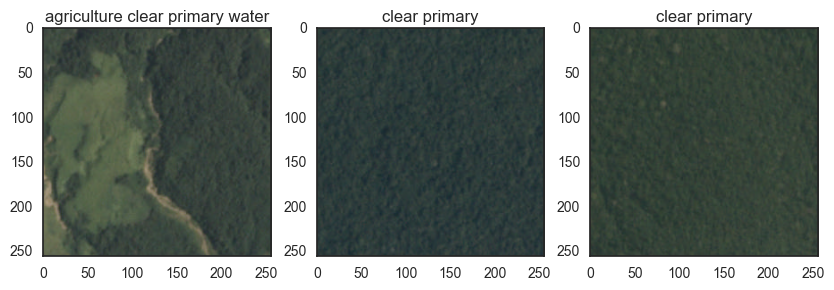

In [114]:
show_image_and_label([1,2,3])

In [115]:
# Transforming list and cleans redundant tags with repeated words
aux=[i.split(' ') for i in df['tags'].values]
aux=[list(set(i)) for i in aux]
df['n param'] = np.array([len(i) for i in aux])
df['tags'] = [' '.join(i) for i in aux]

In [116]:
col2=df['n param']

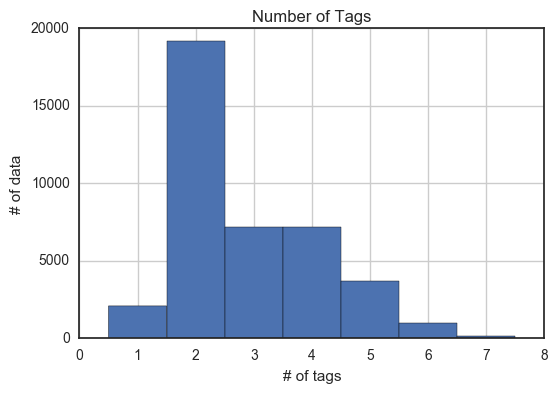

In [117]:
col2.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])
plt.title("Number of Tags")
plt.ylabel('# of data')
plt.xlabel('# of tags')
plt.savefig('Number_of_Tags.png')

In [118]:
Ntotal=len(df)
len(df[df['n param']==1])/Ntotal

0.05165641443711554

In [119]:
df[df['n param']==1].head()

,image_name,tags,n param
12,train_12,cloudy,1
14,train_14,cloudy,1
26,train_26,cloudy,1
50,train_50,cloudy,1
68,train_68,cloudy,1


In [120]:
df[df['n param']==1].tags.value_counts()

cloudy           2089
water               1
partly_cloudy       1
Name: tags, dtype: int64

## Some data exploration

From the histogram, we have discovered that only 5% of the data has only one tag. From these, a huge majority is "cloudy". There is only one "partly_cloudy" and one "water". I was curious to see the picture of the water (see it below). It is a rather strange picture. It could be an error. I will remove it from the data set, in order to test the hypothesis (H1):

(H1) - All data has at least one "atmospheric" tag

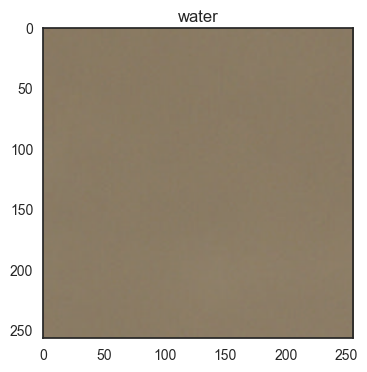

In [121]:
water=df[(df['n param']==1) & (df['tags']=='water')].index[0]

show_image_and_label(water)
df=df.drop(water)
Ntotal-=1

In [122]:
Nprimary=len(df[df['tags'].str.contains('primary')])/Ntotal
print('%% of photos showing "primary": %.2f%%'%(Nprimary*100))

#To avoid colisions with "cloudy".
for i in range(Ntotal):
    df['tags'].values[i]=df['tags'].values[i].replace('partly_cloudy','partly_cldy')

#Creates a dictionary of types
dic_of_types= list(set((' '.join([i for i in df['tags'].values])).split()))
Ntypes=len(dic_of_types)


#Creates 0-1 columns with the new types
for el in dic_of_types:
    df[el]=np.zeros(Ntotal,dtype=int)
    df.loc[df['tags'].str.contains(el),el]=1

% of photos showing "primary": 92.68%


In [123]:
dic_of_types

['partly_cldy',
 'road',
 'blow_down',
 'haze',
 'blooming',
 'bare_ground',
 'cloudy',
 'slash_burn',
 'primary',
 'conventional_mine',
 'artisinal_mine',
 'agriculture',
 'selective_logging',
 'clear',
 'habitation',
 'cultivation',
 'water']

In [37]:
atm_types=['partly_cloudy','cloudy','haze','clear']

In [124]:
df

,image_name,tags,n param,partly_cldy,road,blow_down,haze,blooming,bare_ground,cloudy,slash_burn,primary,conventional_mine,artisinal_mine,agriculture,selective_logging,clear,habitation,cultivation,water
0,train_0,primary haze,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,train_2,clear primary,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,train_3,clear primary,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,train_4,agriculture road primary clear habitation,5,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
5,train_5,primary haze water,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
6,train_6,agriculture clear primary cultivation water,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1
7,train_7,primary haze,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8,train_8,agriculture clear primary cultivation,4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
9,train_9,agriculture road clear primary cultivation,5,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0


## Testing Hypothesis (H1)

Yes, it is true! All data has at least one atmospheric tag

In [39]:
sum(df[atm_types].sum(axis=1)>0)==Ntotal

True

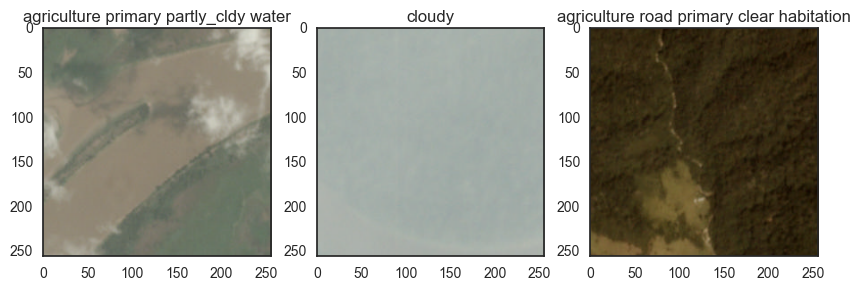

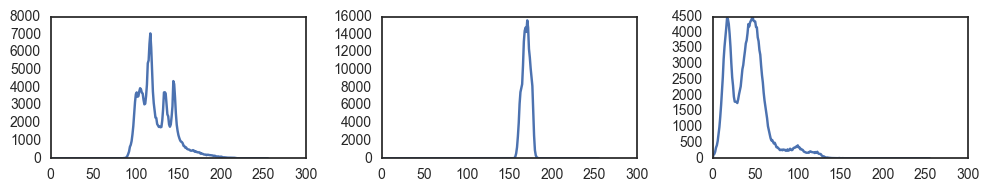

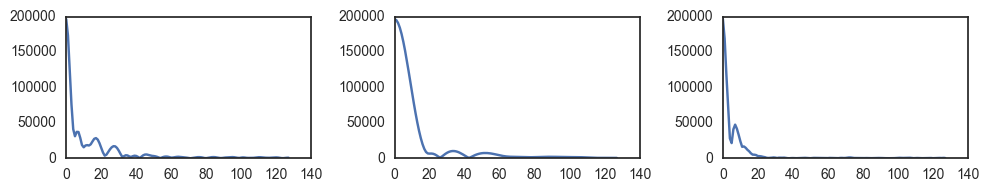

In [130]:
pc=df[df['partly_cldy']==1].index[3]
cloud=df[df['cloudy']==1].index[3]
clear=df[df['clear']==1].index[3]
haze=df[df['haze']==1].index[3]
show_image_and_label([pc,cloud,clear])

i=0
[f,ax]=plt.subplots(1,3,figsize=(10,2))
for image in [pc, cloud, clear]:
    testRGB = cv2.imread('../data/train_jpg/train_'+str(image)+'.jpg')
    testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
    [hist,bins]=np.histogram(testRGB.ravel(),256,[0,256])
    ax[i].plot(hist)
    i+=1
plt.tight_layout()
plt.show()

i=0
[f,ax]=plt.subplots(1,3,figsize=(10,2))
for image in [pc, cloud, clear]:
    testRGB = cv2.imread('../data/train_jpg/train_'+str(image)+'.jpg')
    testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
    [hist,bins]=np.histogram(testRGB.ravel(),256,[0,256])
    fft=np.fft.fft(hist)
    ax[i].plot(np.abs(fft)[0:int(len(fft)/2)])
    i+=1
plt.tight_layout()
plt.show()

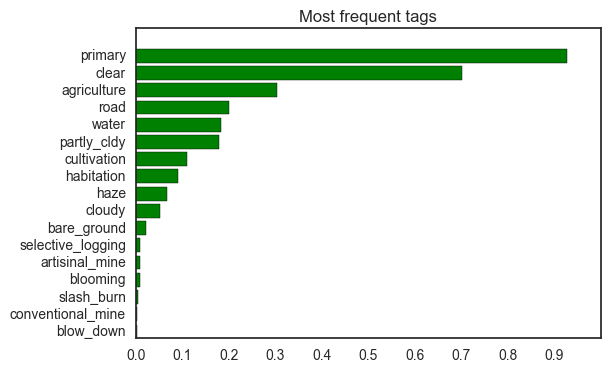

In [125]:
frequencies=np.array([df[el].sum()/Ntotal for el in dic_of_types])
order=frequencies.argsort()
frequencies=frequencies[order]
dic_of_types_np=np.array(dic_of_types)[order]

plt.title('Most frequent tags')
plt.barh(range(Ntypes),frequencies,color='g')
plt.xticks(np.arange(0,1,0.1))
plt.yticks(range(Ntypes),dic_of_types_np,verticalalignment='bottom')

plt.show()

In [126]:
heat=np.zeros([Ntypes,Ntypes])
for i in range(Ntypes):
    for j in range(Ntypes):
        heat[i,j]=(df[df.columns[i+3]]*df[df.columns[j+3]]).sum()

heat=100*heat/Ntotal

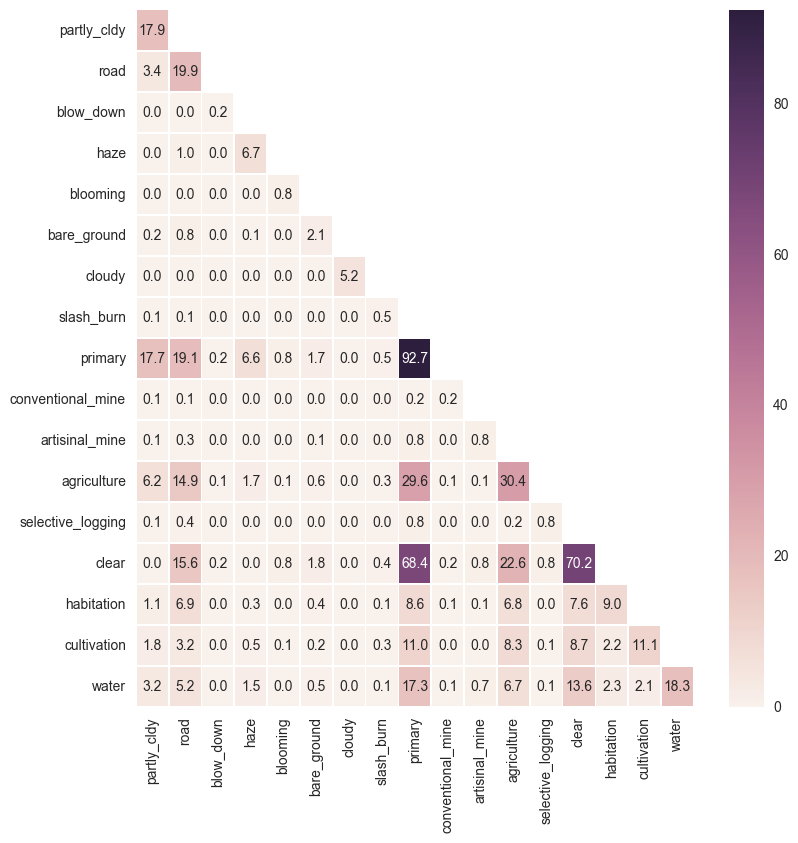

In [127]:
plt.subplots(figsize=(9,9))         # Sample figsize in inches
mask=np.zeros_like(heat)
mask[np.triu_indices_from(mask,k=1)]=True
seaborn.heatmap(heat,linewidths=0.5,xticklabels=dic_of_types,yticklabels=dic_of_types,annot=True,fmt='.1f',
                mask=mask)

In [105]:
df[(df['partly_cldy']*df['cloudy'])==1]

,image_name,tags,n param,road,blow_down,haze,blooming,bare_ground,cloudy,slash_burn,...,conventional_mine,artisinal_mine,agriculture,selective_logging,clear,habitation,partly_cloudy,cultivation,water,partly_cldy


In [108]:
df.columns

Index(['image_name', 'tags', 'n param', 'road', 'blow_down', 'haze',
       'blooming', 'bare_ground', 'cloudy', 'slash_burn', 'primary',
       'conventional_mine', 'artisinal_mine', 'agriculture',
       'selective_logging', 'clear', 'habitation', 'partly_cloudy',
       'cultivation', 'water', 'partly_cldy'],
      dtype='object')